# 事例1: ulmoで気象データと戯れる

## 1-1 東京の最高気温のプロット

- ### ulmoとプロット系のライブラリを読み込む

In [58]:
import ulmo
import pandas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

- ### NOAAが提供する気象データで日本の日毎の気象データをさがす
- ### その中の東京のデータをさがす

In [59]:
st = ulmo.ncdc.ghcn_daily.get_stations(country='JA', as_dataframe=True)
st[st.name.str.contains('TOKYO')]

,country,network,network_id,latitude,longitude,elevation,state,name,gsn_flag,hcn_flag,wm_oid,id
id,,,,,,,,,,,,
JA000047662,JA,0,00047662,35.683,139.7670,36.0,NaN,TOKYO,NaN,NaN,47662,JA000047662
JAW00043311,JA,W,00043311,35.550,139.7667,3.0,NaN,TOKYO,NaN,NaN,NaN,JAW00043311


- ### 東京の気象データがあったので，pandasのデータフレームに

In [60]:
data = ulmo.ncdc.ghcn_daily.get_data('JA000047662', as_dataframe=True)

- ### 最高気温だけを取り出して，スケーリングをキチンとしてプロット

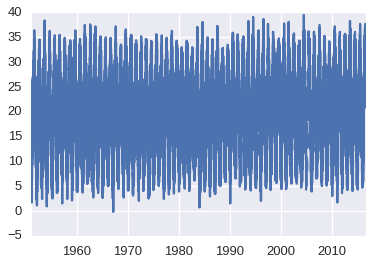

In [61]:
tm = data['TMAX'].copy()
tm.value = tm.value/10.0
tm['value'].plot()

## 1-2 Daymet気象データ

- ### ORNL Daymet: https://daymet.ornl.gov/
- ### 北米の1kmx1kmのグリッド解像度の日次気象データ

- ### 2012年から2013年にかけて，
- ### 緯度35.9313167, 経度-84.3104124の場所の気象

In [62]:
from ulmo.nasa import daymet
ornl_lat, ornl_long = 35.9313167, -84.3104124
df = daymet.get_daymet_singlepixel(longitude=ornl_long, latitude=ornl_lat, 
                                   years=[2012,2013])


In [63]:
df.head()

,year,yday,prcp,tmax,tmin
2012-01-01,2012,1,0.0,15.5,1.0
2012-01-02,2012,2,3.0,10.0,-3.0
2012-01-03,2012,3,0.0,2.0,-7.0
2012-01-04,2012,4,0.0,4.5,-8.0
2012-01-05,2012,5,0.0,10.0,-4.0


- ### 温度変化をグラフに
- ### 15日の移動平均をとった最高気温，最低気温を同時に

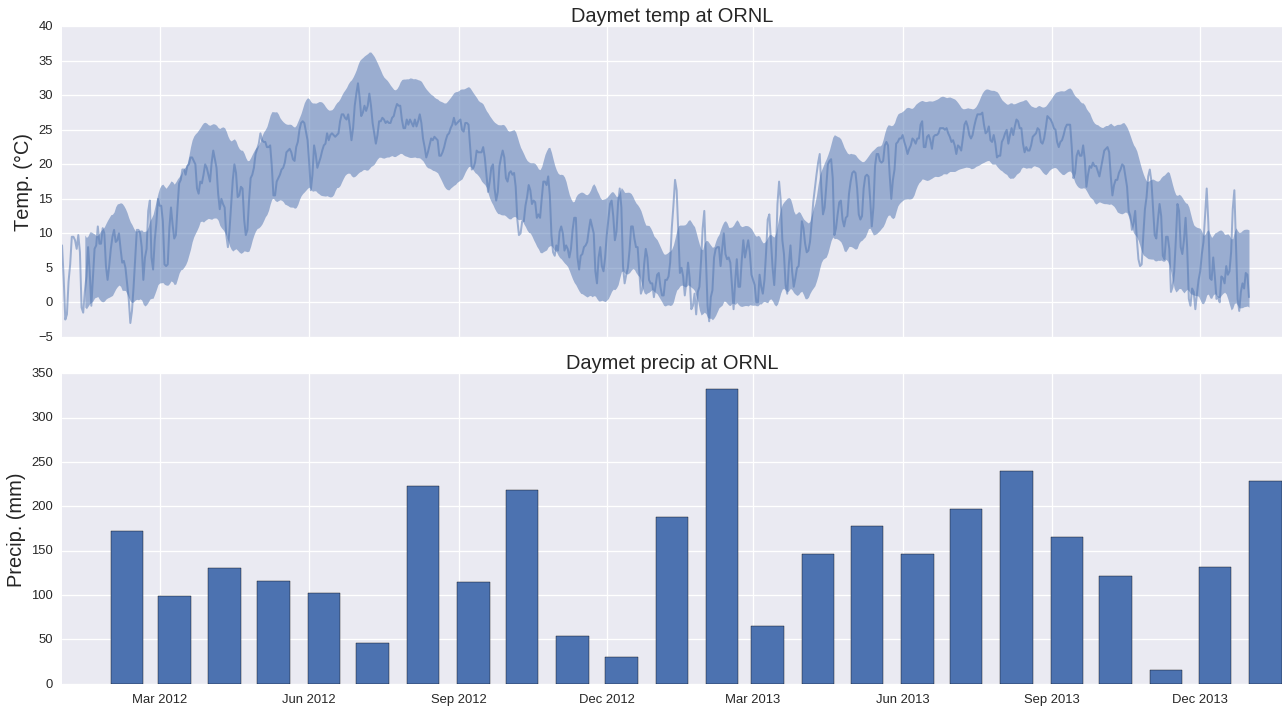

In [64]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(18, 10), sharex=True)
rolling15day = df.rolling(center=False,window=15).mean()
ax1.fill_between(rolling15day.index, rolling15day.tmin, rolling15day.tmax, alpha=0.5, lw=0)
ax1.plot(df.index, df[['tmax', 'tmin']].mean(axis=1), lw=2, alpha=0.5)

ax1.set_title('Daymet temp at ORNL', fontsize=20)
ax1.set_ylabel(u'Temp. (°C)', fontsize=20)

monthlysum = df.resample("M").sum()
ax2.bar(monthlysum.index, monthlysum.prcp, width=20,)
ax2.set_title('Daymet precip at ORNL', fontsize=20)
ax2.set_ylabel(u'Precip. (mm)', fontsize=20)

fig.tight_layout()


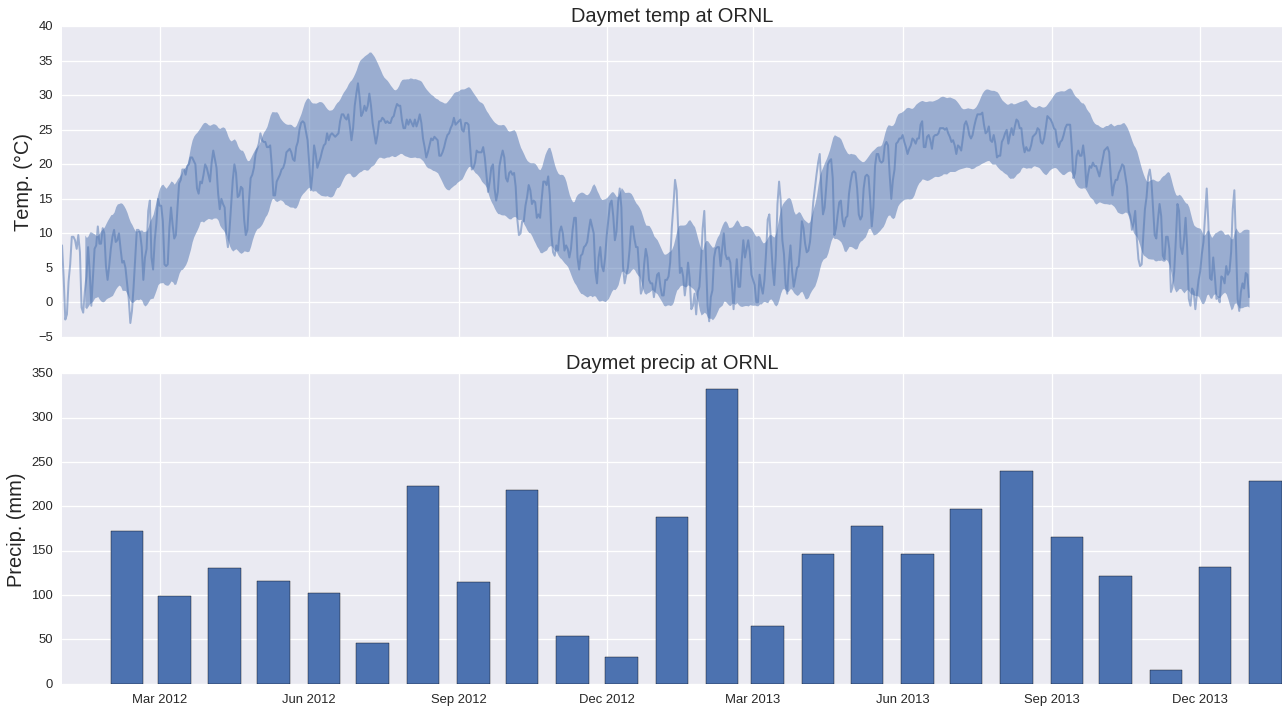

In [65]:
fig

- ### デンバーとマイアミの気温を通年で比較

In [66]:
denver_loc = (-104.9903, 39.7392)
miami_loc = (-80.2089, 25.7753)

denver = daymet.get_daymet_singlepixel(longitude=denver_loc[0], latitude=denver_loc[1], 
                                   years=[2012, 2013, 2014])
miami = daymet.get_daymet_singlepixel(longitude=miami_loc[0], latitude=miami_loc[1], 
                                   years=[2012, 2013, 2014])

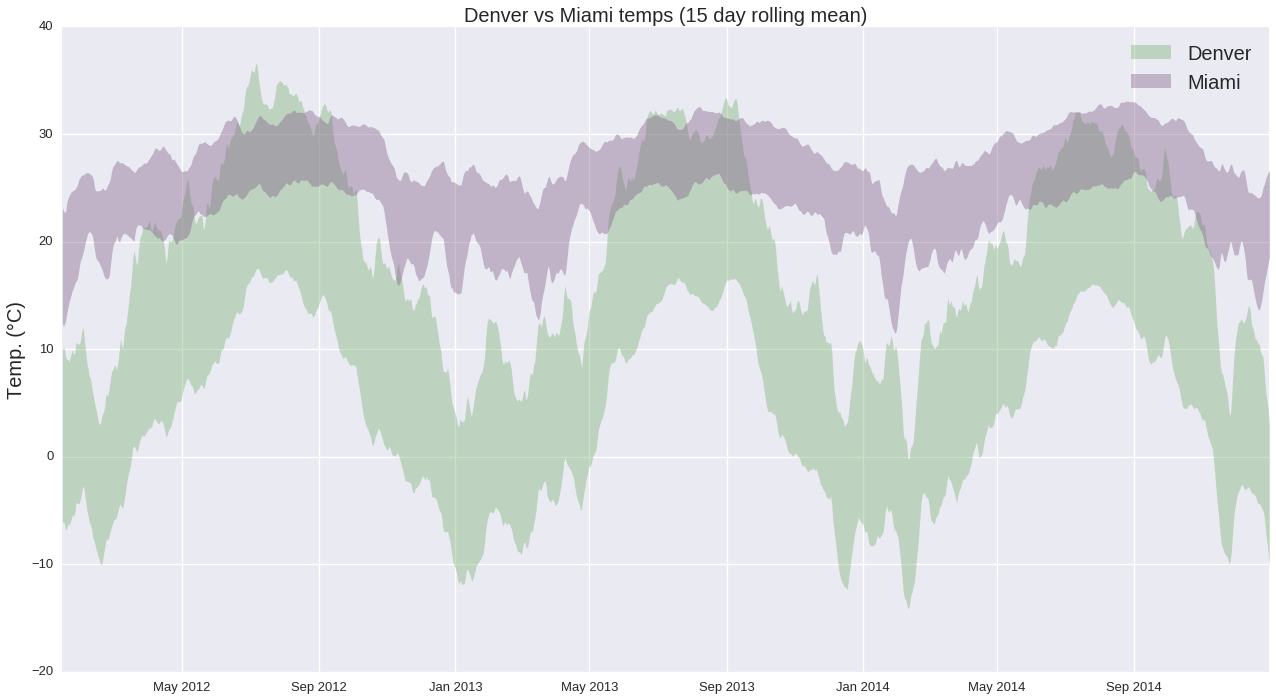

In [67]:
sns.set_context("talk")
fig, ax1 = plt.subplots(1, figsize=(18, 10))
den_15day = denver.rolling(center=False,window=15).mean()
ax1.fill_between(den_15day.index, den_15day.tmin, den_15day.tmax, 
                 alpha=0.4, lw=0, label='Denver', color=sns.xkcd_palette(['faded green'])[0])

ax1.set_title('Denver vs Miami temps (15 day rolling mean)', fontsize=20)

miami_15day = miami.rolling(center=False,window=15).mean()
ax1.fill_between(miami_15day.index, miami_15day.tmin, miami_15day.tmax, 
                 alpha=0.4, lw=0, label='Miami', color=sns.xkcd_palette(['dusty purple'])[0])

ax1.set_ylabel(u'Temp. (°C)', fontsize=20)
fig.tight_layout()
plt.legend(fontsize=20)

- ### フロリダは常夏，しかし夏はデンバーのほうが最高気温が高くなる
- ### 一日の気温差も年間の気温差もデンバーのほうが幅がある

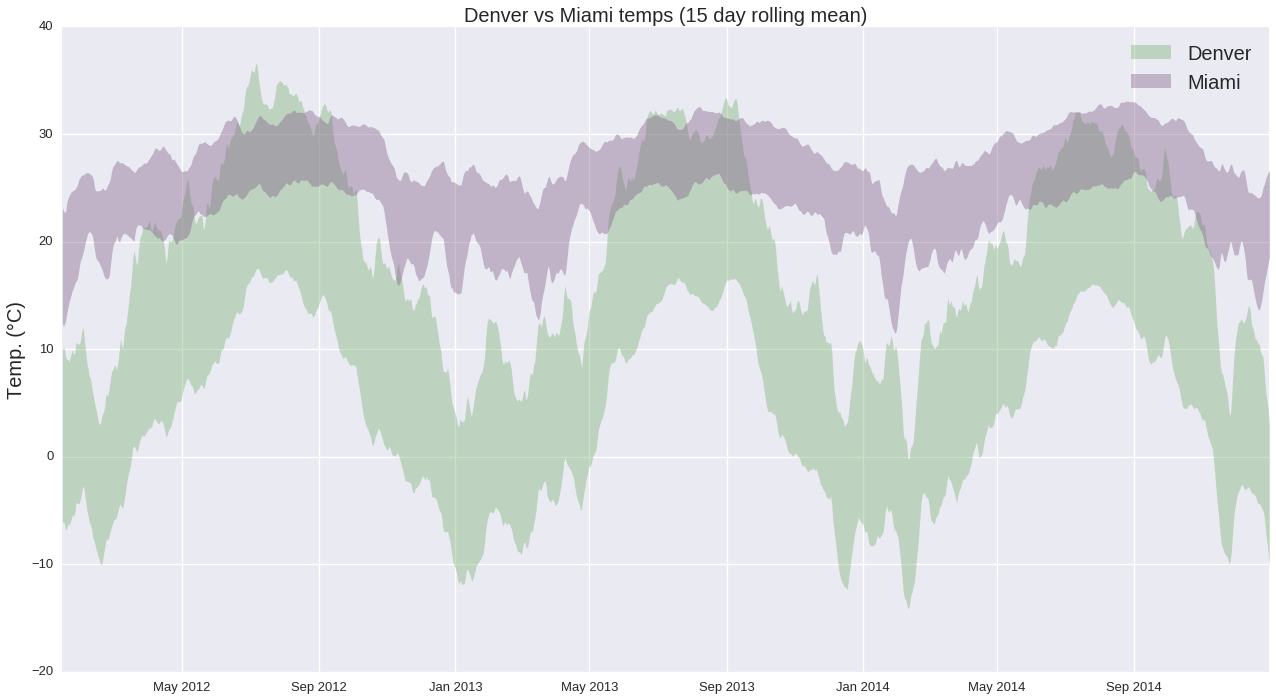

In [68]:
fig